# Проект по изучению популярности компьютерных игр

## Предоставлены данные о выпуске / продаже компьютерных игр за заданный период


In [46]:
# Импортирование необходимых библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
# Загрузка данных
data = pd.read_csv('games.csv')
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [48]:
# Проверка на наличие дубликатов
data.duplicated().sum()

0

### Подготовка данных
- Замена названий столбцов приведение к нижнему регистру;
- Преобразование данные в нужные типы;
- Обработка пропусков при необходимости;
- Подсчет суммарных продаж во всех регионах

In [49]:
# Изменение регистра в названиях столбцов
clms = list(data.columns)
n_clms = {}
for i in clms:
    n_clms[i] = i.lower().strip()
data = data.rename(columns=n_clms)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [50]:
# Проверка на наличие пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [51]:
# Просмотр информации об играх с отсутствующими названиями
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [52]:
# Удаление строк с отсутвующим названием (таковых только две)
data = data.dropna(subset=['name']).reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


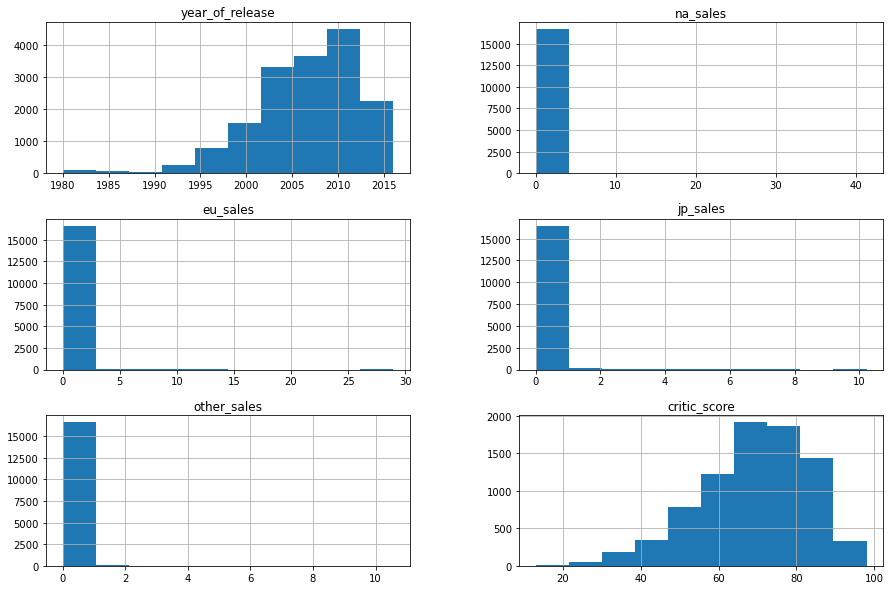

In [53]:
# Визуализация исходных данных
data.hist(figsize=(15,10))
plt.show()

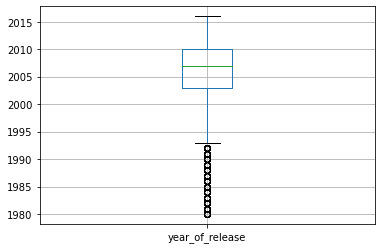

In [54]:
# Просмотр и выбор годов выпуска, значимых для исследования
data.boxplot(column=['year_of_release'])
plt.show()


##### Годы активных продаж
* Основное количество игр продавалось в промежутке между 1993 и 2017 гг.
* Предыдущие периоды можно объединить в одну категорию
* Записи с отсутствующими годами удаляем

In [55]:
# Удаление строк с неизвестным годом 
data = data.dropna(subset=['year_of_release'], axis=0)
data = data.reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [56]:
# Создание столбца с суммой глобальных продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


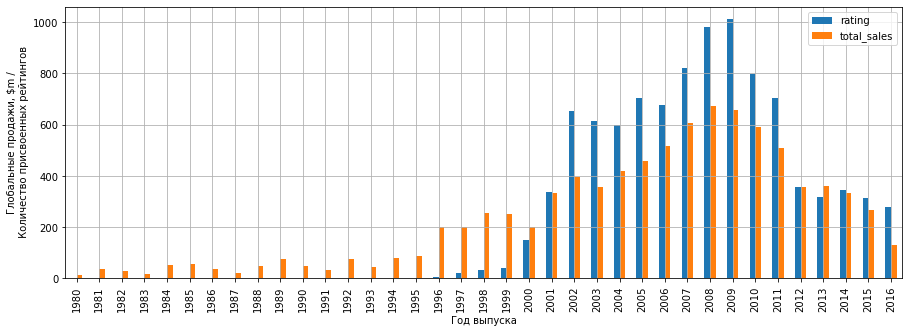

In [57]:
# Просмотр данных по годам
data['year_of_release'] = data['year_of_release'].astype(int)
(data.pivot_table(index=['year_of_release'],
                 values=['total_sales', 'rating'],
                 aggfunc={'total_sales':'sum', 'rating':'count'})
 .plot(kind='bar', grid=True, figsize=(15, 5), xlabel='Год выпуска', ylabel='Глобальные продажи, $m /\n Количество присвоенных рейтингов')
)
plt.show()

In [58]:
# Матрица корреляции исходных величин
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.076220
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083,0.941241
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276,0.901673
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474,0.613305
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410,0.748930
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.245349
total_sales,-0.076220,0.941241,0.901673,0.613305,0.748930,0.245349,1.000000


* Зависимость наблюдается только между объемами продаж, что в общем очевидно

In [59]:
# Количество лет, с объединяемыми данными
old_years = data.query('year_of_release < 1991')['year_of_release'].nunique()
print(type(old_years), old_years)

<class 'int'> 11


In [60]:
# Назначение индекса 1990 для всех записей до 1991 года
data['year_of_release'] = data['year_of_release'].apply(lambda x: x if x >= 1991 else 1990)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1990,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [61]:
# Проверка связи оценок критиков и пользователей
data['critic_score'].corr(data[data['user_score'] != 'tbd']['user_score'].astype(float))

0.5796706281932216

* Связь данных параметров довольно слабая

In [62]:
# Проверка на пропуски
data.isna().sum()
# data.dtypes

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
total_sales           0
dtype: int64

In [63]:
# Замена строковых данных в оценках пользователей на пропуски
data['user_score'] = data['user_score'].replace(to_replace='tbd', value=np.nan)
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [64]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

In [65]:
# Подсчет количества уникальных данных в оценках и рейтингах
display(data[['critic_score', 'user_score', 'rating']].nunique())
data['user_score'] = data['user_score'].astype(float)
#data['user_score'] = data['user_score'].fillna(data.groupby(data['genre'])['user_score'].transform('median'))
#data['critic_score'] = data['critic_score'].fillna(data.groupby(data['genre'])['critic_score'].transform('median'))

critic_score    81
user_score      95
rating           8
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [67]:
# Список всех возрастных рейтингов
st = data['rating'].sort_values().dropna().unique()
st

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [68]:
# Создание словаря с рейтингами
dic = {}
for i in range(len(st)):
    dic[i] = list(st)[i]
display(dic)
dic.keys()

{0: 'AO', 1: 'E', 2: 'E10+', 3: 'EC', 4: 'K-A', 5: 'M', 6: 'RP', 7: 'T'}

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [69]:
#
display(data)
data['rating'] = data['rating'].fillna(value='unknown')
# data.query('rating in @dic.values()')
# data.pivot_table(index=['genre'], columns='rating', values='total_sales', aggfunc='sum', dropna=False).corr()
#data['rating_key'] = data['rating']
# data.assign(rating_key=lambda x: x.rating)
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1990,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1990,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1990,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1990,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


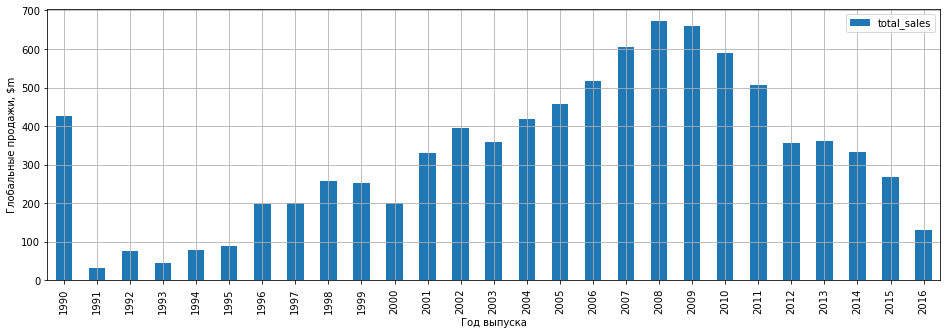

In [70]:
# Продажи по годам
(data.pivot_table(index=['year_of_release'], values='total_sales', aggfunc='sum', dropna=False)
 .plot(kind='bar', grid=True, figsize=(16,5), xlabel='Год выпуска', ylabel='Глобальные продажи, $m')
)
plt.show()

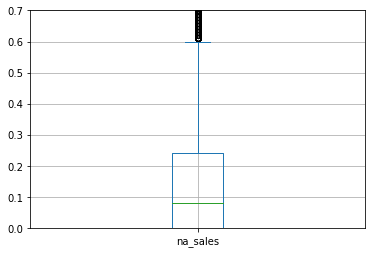

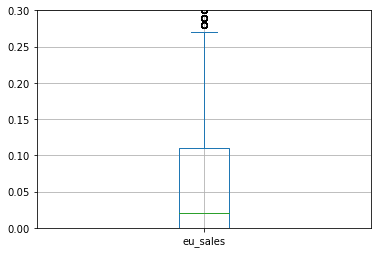

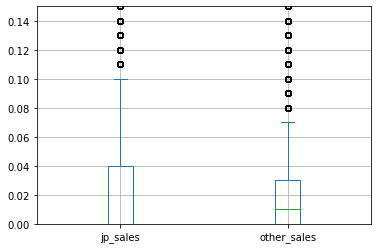

In [71]:
# Просмотр продаж по регионам
data.plot(kind='box', y=['na_sales'], grid=True, ylim=(0, .7))
data.plot(kind='box', y=['eu_sales'], grid=True, ylim=(0, .3))
data.plot(kind='box', y=['jp_sales', 'other_sales'], grid=True, ylim=(0, .15))
plt.show()

### Проведение исследовательского анализа данных
- Количество игр, выпущенных в разные годы
- Изменение продаж по платформам
- Определение актуального периода, построение прогноза на 2017 год
- Лидирущие платформы по продажам; Выбор потенциально прибыльных платформ
- Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и  корреляция между отзывами и продажами
- Общее распределение игр по жанрам

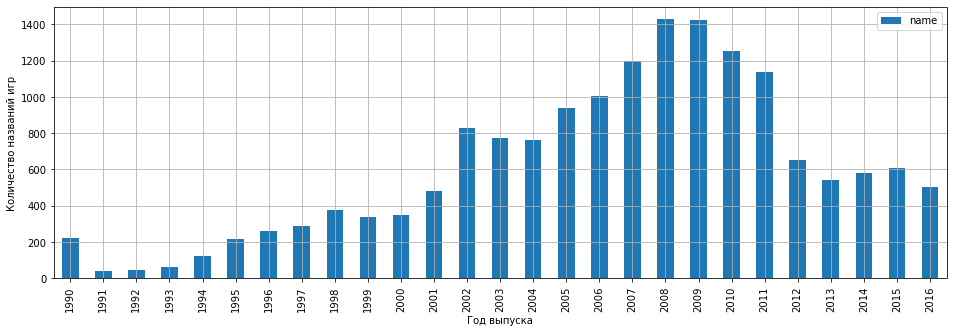

In [72]:
# Количество выпущенных игр по годам
(data.pivot_table(index=['year_of_release'], values='name', aggfunc='count', dropna=False)
 .plot(kind='bar', grid=True, figsize=(16,5), xlabel='Год выпуска', ylabel='Количество названий игр')
)
plt.show()

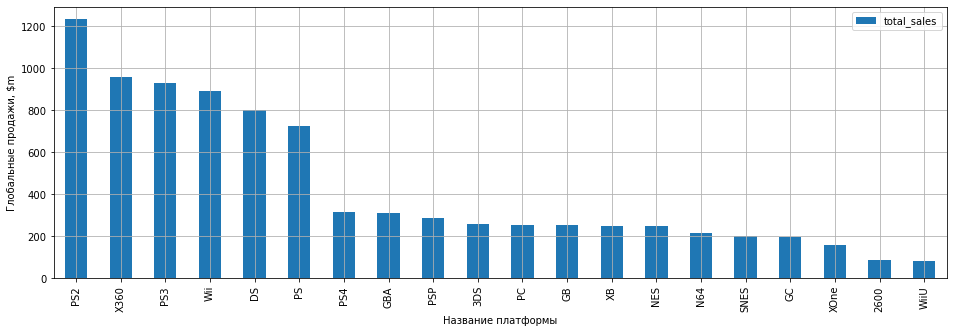

PS2 X360 PS3 Wii DS PS PS4 GBA PSP 3DS PC GB XB NES N64 SNES GC XOne 2600 WiiU PSV SAT GEN DC SCD NG WS TG16 3DO GG PCFX


In [73]:
# Определение наиболее популярных игровых платформ
top_platform = (data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum', dropna=False)
 .sort_values(by='total_sales', ascending=False)
)
top_platform.head(20).plot(kind='bar', grid=True, figsize=(16,5), xlabel='Название платформы', ylabel='Глобальные продажи, $m')
plt.show()
print(*list(top_platform.index))

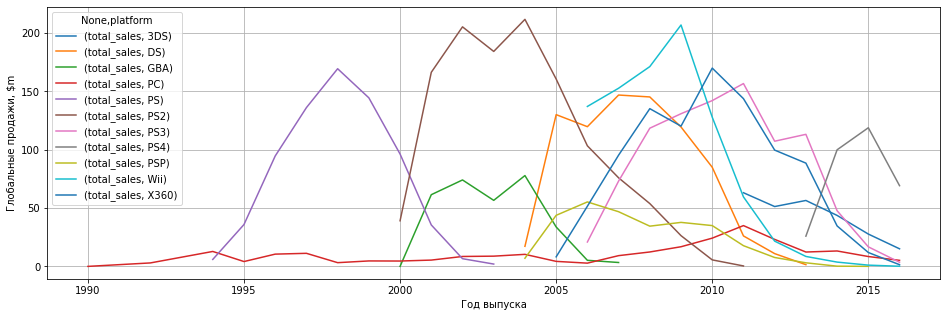

In [74]:
# Расчет объемов продаж по платформам по годам
# data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
(data.query('platform.isin(@top_platform.head(11).index)').pivot_table(index=['year_of_release', 'platform'],
                 values=['total_sales'],
                 aggfunc={'total_sales':'sum'})
 .sort_values(by='total_sales', ascending=False).unstack()
 .plot(kind='line', grid=True, figsize=(16, 5), xlabel='Год выпуска', ylabel='Глобальные продажи, $m')
)

plt.show()

* Как видно из диаграммы, обычный срок жизни платформы составляет порядка 10 лет
* Исключение составляет платформа PC, хотя объемы продаж для нее относительно небольшие
    - Это означает, что у большинства игр существует версия для PC параллельно с игровыми платформами
* Хорошо прослеживается преемственность игр для платформ одного производителя (например: Sony)
    - Количество выпускаемых игр для предыдущей версии снижается при выходе новой PS-PS2-PS3-..

#### Определение актуального периода
* Актуальный период должен быть не менее 10 лет, как среднего срока существования платформы
* В то же время актуальный период должен быть приближен к прогнозному периоду
* Появляются новые платформы, в то время, как некоторые становятся неактуальными
* Некоторые платформы находятся в начале своего цикла развития и не имеют достаточного количества игр, и, соответственно, продаж

##### Можно выбрать период с 2005 по 2015 (11 лет), когда некоторые платформы находились на пике, некоторые проходили полный жизненный цикл, а некоторые только зарождались

In [75]:
# Создание таблицы с данными за актуальный период
data_actual = data.query('year_of_release >= 2012 & year_of_release <= 2015').reset_index(drop=True)
data_actual
#data_actual.total_sales.sum() / data.total_sales.sum()
#data_actual.total_sales.count() / data.total_sales.count()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2379,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
2380,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
2381,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2382,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


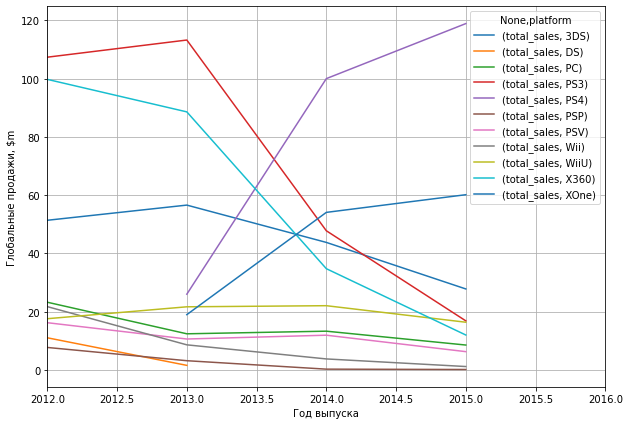

In [76]:
# Визуализация продаж по годам выпуска для разных игровых платформ
(data_actual.pivot_table(index=['year_of_release', 'platform'],
                 values=['total_sales'], aggfunc={'total_sales':'sum'})
 .sort_values(by='total_sales', ascending=False).unstack()
 .plot(kind='line', grid=True, figsize=(10, 7), xlabel='Год выпуска', ylabel='Глобальные продажи, $m', xlim=(2012,2016))
)

plt.show()

* Как видно из графика две платформы показывают динамичный рост (PS4 & XOne), большинство прочих находятся на спаде
* Некоторые новые платформы показывают стабильные продажи, однако их объем невелик
    - возможно это связано с небольшим количеством игр выпущенных для них, или с ограниченным применением, или с недостаточным продвижением на рынке

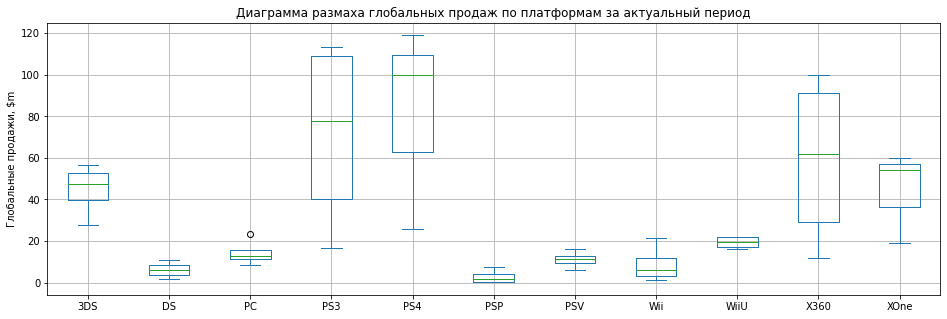

In [77]:
# Построение диаграммы размаха для разных платформ
(data_actual.pivot_table(index='year_of_release', columns='platform',
                 values='total_sales', aggfunc='sum')
 .plot(kind='box', grid=True, figsize=(16, 5), title='Диаграмма размаха глобальных продаж по платформам за актуальный период',
       xlabel='Игровые платформы', ylabel='Глобальные продажи, $m')
)
plt.show()

* Как видно из диаграммы размах продаж по разным платформам сильно различается
* Это зависит от популярности тех или иных платформ, а также от периода жизненного цикла

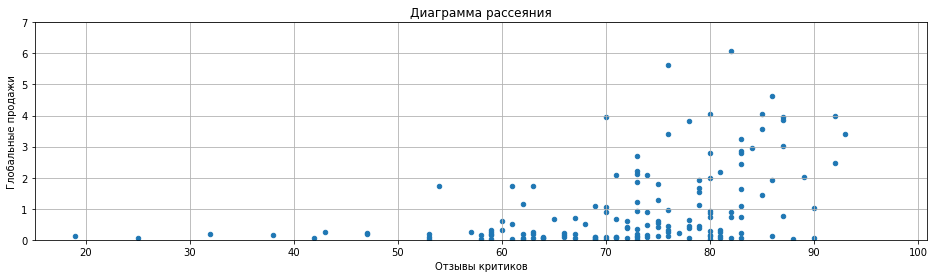

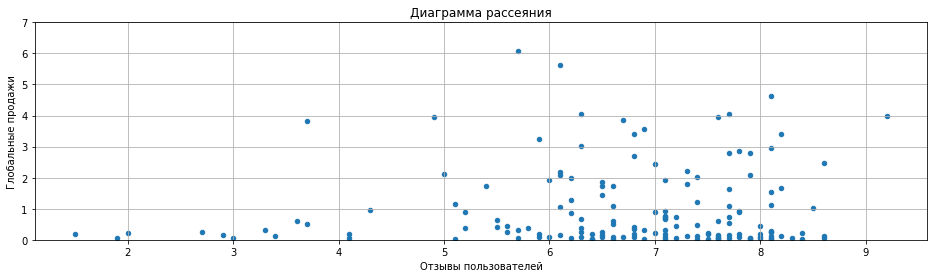

In [78]:
# Диаграммы рассеяния продаж в зависимости от ценок критиков и пользователей для платформы X360
data_actual.query('platform == "PS4"')\
.plot(kind='scatter', title='Диаграмма рассеяния', xlabel='Отзывы критиков', ylabel='Глобальные продажи',\
      y='total_sales', x='critic_score', grid=True, ylim=(0,7), figsize=(16,4))
data_actual.query('platform == "PS4"')\
.plot(kind='scatter', title='Диаграмма рассеяния', xlabel='Отзывы пользователей', ylabel='Глобальные продажи',\
      y='total_sales', x='user_score', grid=True, ylim=(0,7), figsize=(16,4))
plt.show()

In [79]:
# Зависимость продаж от оценок критиков по платформе X360
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.critic_score)

0.4318482049982005

* Корреляция довольно низкая

In [80]:
# Зависимость продаж от оценок пользователей по платформе X360
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.user_score)

0.024230832360622585

* Зависимость практически не наблюдается

In [81]:
# Общая взаимозависимость параметров 
data_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.041197,-0.011280,-0.038079,-0.013575,-0.012500,-0.028668,-0.032530
na_sales,-0.041197,1.000000,0.780881,0.260919,0.792312,0.301284,-0.011712,0.923709
eu_sales,-0.011280,0.780881,1.000000,0.269277,0.939759,0.296071,-0.017359,0.931647
jp_sales,-0.038079,0.260919,0.269277,1.000000,0.198733,0.123301,0.175385,0.446862
other_sales,-0.013575,0.792312,0.939759,0.198733,1.000000,0.280680,-0.006688,0.907164
critic_score,-0.012500,0.301284,0.296071,0.123301,0.280680,1.000000,0.534083,0.320037
user_score,-0.028668,-0.011712,-0.017359,0.175385,-0.006688,0.534083,1.000000,0.010422
total_sales,-0.032530,0.923709,0.931647,0.446862,0.907164,0.320037,0.010422,1.000000


* Картина повторяется для всех остальных платформ
* Корреляция продаж с оценками еще ниже, нежели для популярных платформ 0.2365 и 0.0805 соответственно
* По всем платформамм оценки распределяются неравномерно, поэтому для менее популярных зависимость очевидно еще ниже

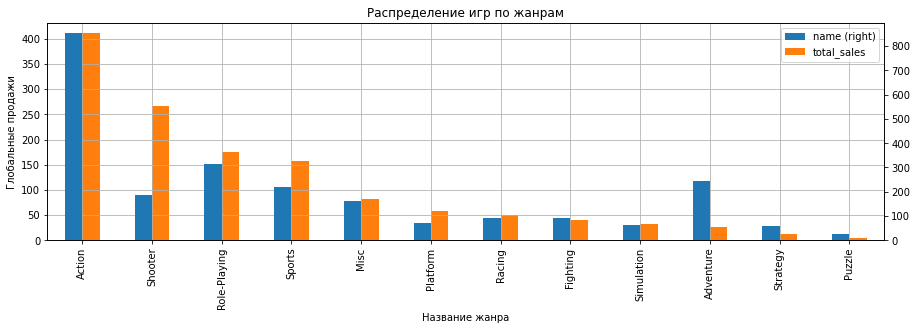

In [82]:
# Распределение продаж игр по жанрам 
data_actual.pivot_table(index='genre', values=['total_sales', 'name'], \
                 aggfunc={'total_sales':'sum','name':'count'})\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', secondary_y='name', title='Распределение игр по жанрам',\
      xlabel='Название жанра', ylabel='Глобальные продажи',\
      grid=True, figsize=(15,4), sort_columns=False)
plt.show()

* Распределение игр по жанрам показывает наиболее продаваемые игры
* По всем параметрам (количеству и продажам) лидируют игры жанра Action, Sports, Shooter, RPG
* Однако можно встретить аномалии - при меньшем количестве продаваемых игр (например Platform) они приносят значительно больше дохода по сравнению с играми Adventure
* Для оценки удельного дохода на каждую игру возможно имеет смысл посчитать отношение дохода к количеству выпущенных игр, однако это может быть некорректно из-за разных годов выпуска
* Наименее доходными являются Стратегии и Приключения, несмотря на довольно большое количество выпущенных игр

### Портрет пользователя каждого региона
- Определение портрета пользователя для каждого региона (NA, EU, JP):
- Определение популярных платформ (топ-5) по регионам
- Определение популярных жанров (топ-5) по регионам
- Влияние рейтинга ESRB на продажи в отдельном регионе

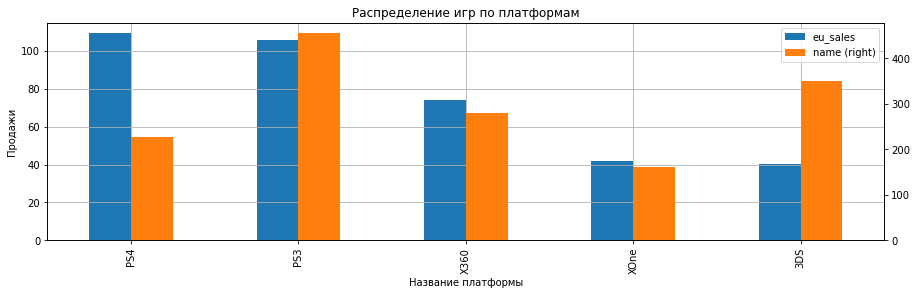

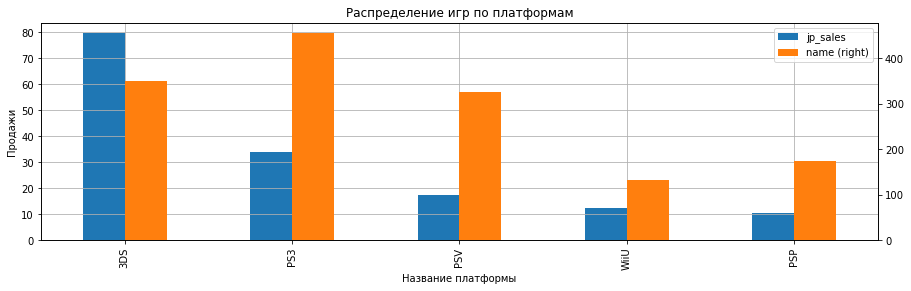

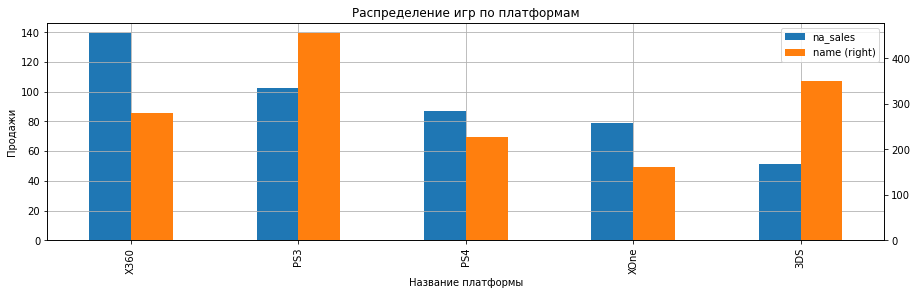

In [83]:
# Выбор данных по регионам продаж
reg_sales = data_actual.pivot_table(index=['platform', 'genre'], values=('na_sales', 'eu_sales', 'jp_sales'),\
                 aggfunc='sum')
# Диаграмма объемов продаж для 5 крупнейших платформ по регионам
for i in reg_sales.columns:
    data_actual.pivot_table(index='platform', values=(i, 'name'),\
                            aggfunc={i:'sum','name':'count'})\
    .sort_values(by=i, ascending=False).head()\
    .plot(kind='bar', secondary_y='name', title='Распределение игр по платформам',\
          xlabel='Название платформы', ylabel='Продажи',\
          grid=True, figsize=(15,4))
plt.show()

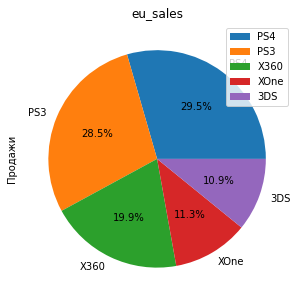

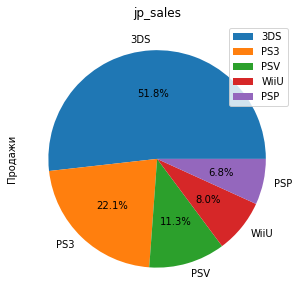

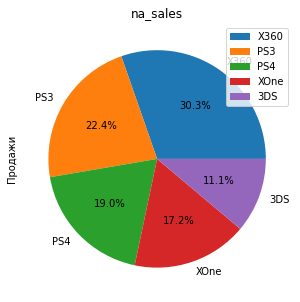

In [84]:
# Соотношение долей продаж для пяти курпнейших платформ по регионам
for i in reg_sales.columns:
    data_actual.pivot_table(index=['platform'], values=(i, 'name'),\
                            aggfunc={i:'sum','name':'count'})\
    .sort_values(by=i, ascending=False).head()\
    .plot(kind='pie', y=i, title=i, ylabel='Продажи', figsize=(5,5), autopct='%1.1f%%')
    plt.show()

* Пользователи отдают предпочтения разным платформам в зависимости от региона
    - например, в Северной Америке на первых местах продукты для X360 и Wii
    - в Японии лидируют платформы DS, 3DS, затем разные версии PS
    - европейские же пользователи наслаждаются платформами от X360, PS3, Wii
* Платформа DS/3DS пользуется значительно меньшей популярностью среди игроков в Европе и Америке

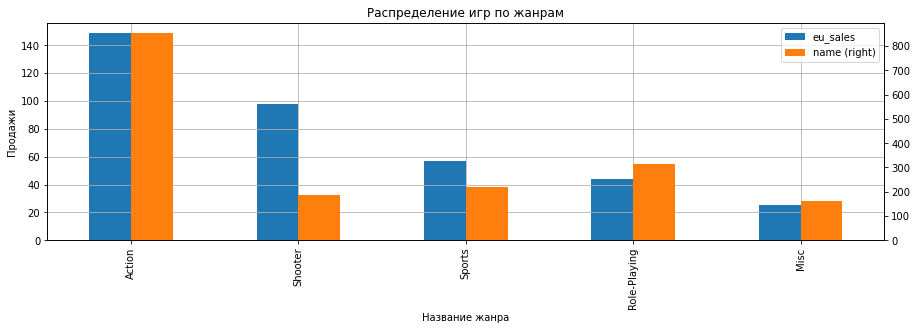

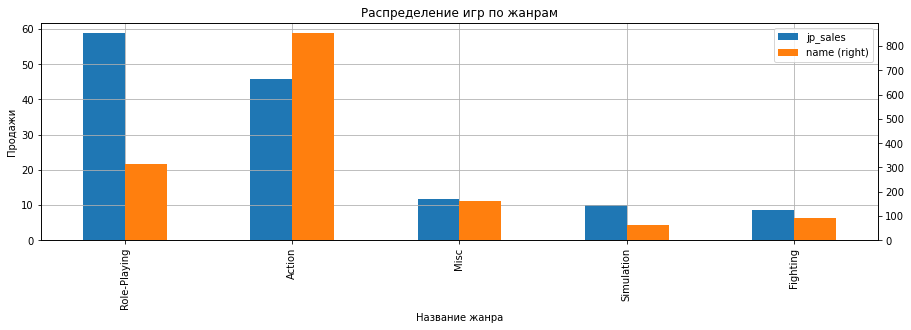

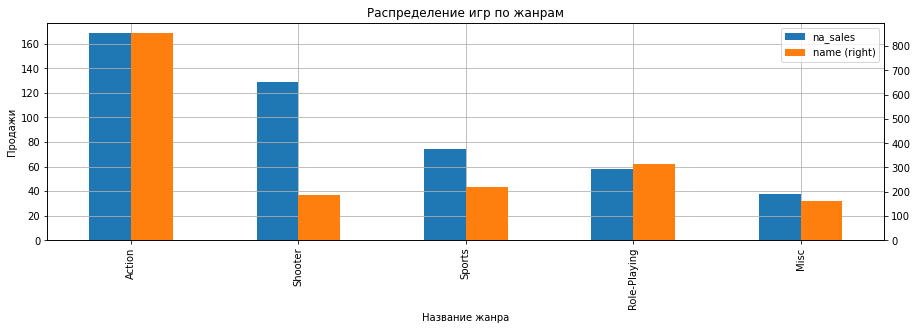

In [85]:
# Определение пяти популярных жанров по регионам
for i in reg_sales.columns:
    data_actual.pivot_table(index='genre', values=(i, 'name'),\
                            aggfunc={i:'sum','name':'count'})\
    .sort_values(by=i, ascending=False).head()\
    .plot(kind='bar', secondary_y='name', title='Распределение игр по жанрам',\
          xlabel='Название жанра', ylabel='Продажи',\
          grid=True, figsize=(15,4))
plt.show()

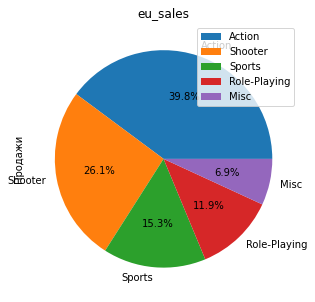

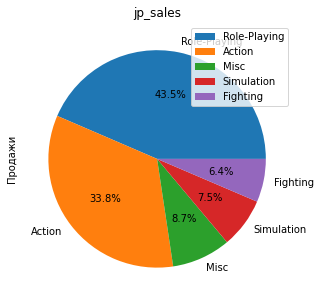

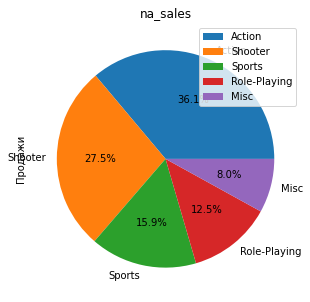

In [86]:
# Соотношение доли продаж пяти популярных жанров по регионам
plt.layout=(3,1)
for i in reg_sales.columns:
    data_actual.pivot_table(index='genre', values=(i, 'name'),\
                            aggfunc={i:'sum','name':'count'})\
    .sort_values(by=i, ascending=False).head()\
    .plot(kind='pie', y=i, title=i, ylabel='Продажи', figsize=(5,5), autopct='%1.1f%%')
plt.show()

* Анализ пользовательских предпочтений показывает, что жанровые предпочтения во многом сходятся в Северной Америке и Европе (Action, Sports, Shooter), однако сильно отличаются у пользователей в Японии (RPG, Action, Misc)
* Это может говорить о большой разнице в менталитете пользователей
* Также это может свидетельствовать об адаптации предпочтительных жанров для тех или иных платформ

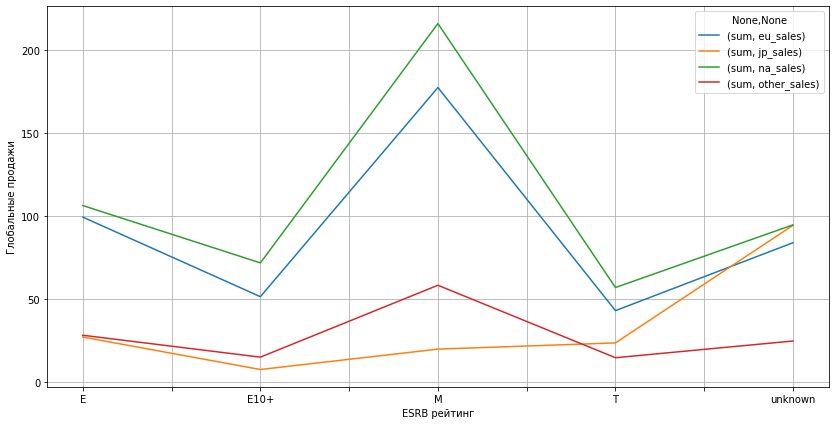

In [87]:
# Оценка влияния возрастного рейтинга на продажи
rate = data_actual.query('rating.notna()')
rate.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])\
.plot(kind='line', xlabel='ESRB рейтинг', ylabel='Глобальные продажи', grid=True, figsize=(14,7))
plt.show()

* По всем регионам форма кривой практически повторяется
* Это означает, собственно рейтинг не влияет на объемы продаж игр

### Проверка гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные


#### Формулируем гипотезу
* H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H_1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [88]:
# вызов метода для проверки гипотезы
xone = data_actual.query('platform == "XOne" & user_score.notna()')['user_score']
pc = data_actual.query('platform == "PC" & user_score.notna()')['user_score']
# print(xone.mean())
# print(pc.mean())
results = stats.ttest_ind(xone, pc, equal_var=False)

alpha = .05 # задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9441751855931831
Не получилось отвергнуть нулевую гипотезу


#### Вывод
* Выбран метод сравнения независимых выборок
* Уровень значимости выбран равным 5%
* Нулевая гипотеза отвергнута, поскольку вероятность равенства пользовательских оценок для этих платформ менее уровня значимости

#### Формулируем гипотезу
* H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* H_1: Средние пользовательские рейтинги жанров Action и Sports разные

In [89]:
# вызов метода для проверки гипотезы
action = data_actual.query('genre == "Action" & user_score.notna()')['user_score']
sports = data_actual.query('genre == "Sports" & user_score.notna()')['user_score']

# print(action.mean())
# print(sports.mean())

results = stats.ttest_ind(action, sports, equal_var=False)

alpha = .05 # задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.7671307856639633e-18
Отвергаем нулевую гипотезу


#### Вывод
* Нулевая гипотеза сформулирована, как равенство пользовательских оценок для разных жанров
* Соответственно, альтернативня гипотеза говорит о том, что пользовательские оценки выбранных жанров не равны
* Выбран метод сравнения независимых выборок
* Уровень значимости выбран равным 5%
* Нулевая гипотеза отвергнута, поскольку вероятность равенства пользовательских оценок для этих жанров менее уровня значимости

#### Общий вывод
##### Подготовка данных
* Проведен анализ данных о продажах различных игр по регионам
* Проанализированы данные по платформам и жанрам
* Удалены лишние данные с отсутствующими названиями игр и пропущенными годами выпуска
* Пропуски в оценках критиков и пользователей заполнены медианными значениями по жанру
##### Исследование
* Количество выпускаемых игр заметно росло до 2010 года, затем снизилось и стабилизировалось
* Продажи по годам выпуска также росли пропорционально количеству игр, затем снизились
* В 2016 году зафиксированные продажи значительно ниже, чем в предыдущие, что может говорить о неполноте представленных данных
* Определено, что средний срок жизни игровой платформы равен 10 годам
* В качестве актуального периода выбран 11 летний период, чтобы покрыть средний цикл жизни игровых платформ
* Выявлено, что оценки пользователей и критиков практически не влияют на продажи внутри одной популярной платформы, аналогичная картина наблюдается для всех платформ
* Определены наиболее популярные игровые жанры по объемам продаж
##### Различия по макрорегионам
* Структура продаж по регионам отличается друг от друга
* Отличия заметны как по жанрам, так и по игровым платформам
* Данные показывают распространенность тех или иных платформ по регионам, а также пользовательские предпочтения
* Возрастные рейтинги никак не влияют на продажи игр по регионам
##### Сравнение статистических гипотез
1. Предположении о равестве средних оценок пользователей на платформах XOne и PC не подтвердилось
2. Средние оценки пользователей популярных жанров (Action и Sports) также отличаются

### Прогноз
* Для прогнозирования продаж на будущий период следует:
    - Обратить внимание на популярные жанры, характерные для региона
    - Учесть новые платформы, находящиеся на пике или в фазе роста продаж
    - Постепенно отказываться от игровых платформ, продажи которых идут на спад